# Bivariate choropleth map notebook 

Made as part of Master’s thesis by Jonatan Hildén and used to create demonstration maps.

Released under the MIT licence 2022 

Used data © Statistics Finland (CC BY 4.0)

- Municipial and regional statistics: Municipal key figures 1987-2018 https://pxdata.stat.fi/PxWeb/pxweb/en/Kuntien_avainluvut/Kuntien_avainluvut__2019/kuntien_avainluvut_2019_aikasarja.px/
- Geodata, municipalities: https://stat.fi/org/avoindata/paikkatietoaineistot/kuntapohjaiset_tilastointialueet_en.html
- Geodata, regions: https://stat.fi/org/avoindata/paikkatietoaineistot/kuntapohjaiset_tilastointialueet_en.html


Copyright 2022 Jonatan Hildén

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


In [ ]:
# main imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
from MPL_utilityfuncs import *

sns.set_theme(style="ticks")
plt.style.use('masters_xport.mplstyle')

In [ ]:
# geoprocessing imports
import fiona # version '1.8.22'
import geopandas # version '0.12.0'

In [ ]:
# bivariate analysis functions
# uses qcut function to divide each data series into quantiles

def bivariate(data, seriesY, seriesX, classes, yFirst=True):
    # series1 = x, series2 = Y
    # default return values as y-x
    s1, bins1 = pd.qcut(data[seriesY], classes, labels=[i+1 for i in range(classes)], retbins=True)
    s2, bins2 = pd.qcut(data[seriesX], classes, labels=[i+1 for i in range(classes)], retbins=True)  
    d_combined = pd.merge(s1, s2, left_index=True, right_index=True)
    if yFirst:
        d_combined['bivariate'] = d_combined[seriesY].astype('str') + "-" + d_combined[seriesX].astype('str')
    else: d_combined['bivariate'] = d_combined[seriesX].astype('str') + "-" + d_combined[seriesY].astype('str')

    print(f"X {seriesX} {bins2};\nY {seriesY} {bins1}")
    return d_combined

def arrange_bivariate(data, classes=3):
    # pass a dataframe with bivariate data in format 1-1, 1-2, etc

    vals = [str(i + 1) for i in range(classes)]

    b = []
    for i in range(classes*classes):
        b.append(vals[i%classes] + "-" + vals[i//classes])

    bivariate = [[] for i in range(classes)]
    j = 0
    for i, d in enumerate(b):
        try:
            bivariate[j].append(data.value_counts()[d])
        except: bivariate[j].append(np.nan)
        if i%classes==classes-1:
            j+=1
            
    Index= [f"y {v}" for v in vals]
    Cols = [f"x {v}" for v in vals]
    bivariate
    df = pd.DataFrame(bivariate, index=Index, columns=Cols)
    
    return df
            
    

# Regional Dataset: X vs Y

In [ ]:
name1 = 'maakuntien_avainluvut_20220926-143707'
data1 = pd.read_csv(f'tables/{name1}.csv', sep=',', decimal='.', skiprows=1)
data1

Region 2019  Degree of urbanisation, %, 2018  Population, 2018  \
0                Uusimaa                             95.5           1671024   
1      Southwest Finland                             85.4            478582   
2              Satakunta                             83.3            218624   
3             Kanta-Häme                             82.3            171364   
4              Pirkanmaa                             88.4            515095   
5            Päijät-Häme                             88.2            200629   
6            Kymenlaakso                             87.2            173388   
7          South Karelia                             83.9            128756   
8             South Savo                             70.9            144615   
9             North Savo                             76.5            245602   
10         North Karelia                             72.9            162240   
11       Central Finland                             80.6            275521   
12    South Ostrobothnia                             73.1            189715   
13          Ostrobothnia                             84.0            180794   
14  Central Ostrobothnia                             78.8             68437   
15    North Ostrobothnia                             83.7            412161   
16                Kainuu                             74.4             73061   
17               Lapland                             77.9            178522   
18                 Åland                             62.8             29789   

    Population change from the previous year, %, 2018  \
0                                                 0.9   
1                                                 0.2   
2                                                -0.8   
3                                                -0.8   
4                                                 0.6   
5                                                -0.3   
6                                                -1.2   
7                                                -0.9   
8                                                -1.8   
9                                                -0.4   
10                                               -0.5   
11                                               -0.2   
12                                               -0.6   
13                                               -0.1   
14                                               -0.5   
15                                                0.1   
16                                               -1.2   
17                                               -0.4   
18                                                1.0   

    Share of persons aged under 15 of the population, %, 2018  \
0                                                16.6           
1                                                15.0           
2                                                14.8           
3                                                15.5           
4                                                16.0           
5                                                14.7           
6                                                13.6           
7                                                13.6           
8                                                12.8           
9                                                14.8           
10                                               14.1           
11                                               16.0           
12                                               16.7           
13                                               17.3           
14                                               18.9           
15                                               19.6           
16                                               14.1           
17                                               15.1           
18                                               16.6   

In [ ]:
region_codes = pd.read_csv('tables/001_11ra_2020_20220128-141310.csv', sep='\t')
region_codes['code'] = region_codes['Area'].str[2:4]
region_codes['name'] = region_codes['Area'].str[5:]

region_codes

Area        Information     2018 code  \
0                MK01 Uusimaa  Population 31 Dec  1671024   01   
1      MK02 Southwest Finland  Population 31 Dec   478582   02   
2              MK04 Satakunta  Population 31 Dec   218624   04   
3             MK05 Kanta-Häme  Population 31 Dec   171364   05   
4              MK06 Pirkanmaa  Population 31 Dec   517333   06   
5            MK07 Päijät-Häme  Population 31 Dec   207394   07   
6            MK08 Kymenlaakso  Population 31 Dec   166623   08   
7          MK09 South Karelia  Population 31 Dec   128756   09   
8             MK10 South Savo  Population 31 Dec   136474   10   
9             MK11 North Savo  Population 31 Dec   250414   11   
10         MK12 North Karelia  Population 31 Dec   165569   12   
11       MK13 Central Finland  Population 31 Dec   273283   13   
12    MK14 South Ostrobothnia  Population 31 Dec   194316   14   
13          MK15 Ostrobothnia  Population 31 Dec   176193   15   
14  MK16 Central Ostrobothnia  Population 31 Dec    68437   16   
15    MK17 North Ostrobothnia  Population 31 Dec   412161   17   
16                MK18 Kainuu  Population 31 Dec    73061   18   
17               MK19 Lapland  Population 31 Dec   178522   19   
18                 MK21 Åland  Population 31 Dec    29789   21   

                    name  
0                Uusimaa  
1      Southwest Finland  
2              Satakunta  
3             Kanta-Häme  
4              Pirkanmaa  
5            Päijät-Häme  
6            Kymenlaakso  
7          South Karelia  
8             South Savo  
9             North Savo  
10         North Karelia  
11       Central Finland  
12    South Ostrobothnia  
13          Ostrobothnia  
14  Central Ostrobothnia  
15    North Ostrobothnia  
16                Kainuu  
17               Lapland  
18                 Åland

In [ ]:
# join data table with region codes
data_regional = data1.merge(region_codes[['name', 'code']], left_on='Region 2019', right_on='name', how='left')
data_regional

Region 2019  Degree of urbanisation, %, 2018  Population, 2018  \
0                Uusimaa                             95.5           1671024   
1      Southwest Finland                             85.4            478582   
2              Satakunta                             83.3            218624   
3             Kanta-Häme                             82.3            171364   
4              Pirkanmaa                             88.4            515095   
5            Päijät-Häme                             88.2            200629   
6            Kymenlaakso                             87.2            173388   
7          South Karelia                             83.9            128756   
8             South Savo                             70.9            144615   
9             North Savo                             76.5            245602   
10         North Karelia                             72.9            162240   
11       Central Finland                             80.6            275521   
12    South Ostrobothnia                             73.1            189715   
13          Ostrobothnia                             84.0            180794   
14  Central Ostrobothnia                             78.8             68437   
15    North Ostrobothnia                             83.7            412161   
16                Kainuu                             74.4             73061   
17               Lapland                             77.9            178522   
18                 Åland                             62.8             29789   

    Population change from the previous year, %, 2018  \
0                                                 0.9   
1                                                 0.2   
2                                                -0.8   
3                                                -0.8   
4                                                 0.6   
5                                                -0.3   
6                                                -1.2   
7                                                -0.9   
8                                                -1.8   
9                                                -0.4   
10                                               -0.5   
11                                               -0.2   
12                                               -0.6   
13                                               -0.1   
14                                               -0.5   
15                                                0.1   
16                                               -1.2   
17                                               -0.4   
18                                                1.0   

    Share of persons aged under 15 of the population, %, 2018  \
0                                                16.6           
1                                                15.0           
2                                                14.8           
3                                                15.5           
4                                                16.0           
5                                                14.7           
6                                                13.6           
7                                                13.6           
8                                                12.8           
9                                                14.8           
10                                               14.1           
11                                               16.0           
12                                               16.7           
13                                               17.3           
14                                               18.9           
15                                               19.6           
16                                               14.1           
17                                               15.1           
18                                               16.6   

## Contingency table visualization to find data pairs

X Share of persons aged under 15 of the population, %, 2018 [12.8 14.8 16.  19.6];
Y Social and health care activities, total, operating net costs, EUR per capita, 2018 [1824.  3365.9 3598.2 4341.1]


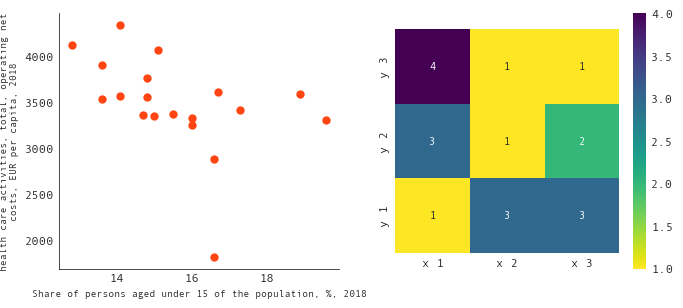

In [ ]:
# Choose and visualize contingency table for a particular data set pair

columnY = 'Social and health care activities, total, operating net costs, EUR per capita, 2018'
columnX = 'Share of persons aged under 15 of the population, %, 2018'
#columnY = data1.columns[6]
#columnX = data1.columns[1]

x = data_regional[columnX]
y = data_regional[columnY]

data1_bivariate = arrange_bivariate(bivariate(data_regional, columnY, columnX, 3, yFirst=False)['bivariate'])
data1_bivariate


f1_1, ax = plt.subplots(nrows=1, ncols=2, figsize=cm2inch(18, 8))

sns.set(font_scale=0.8)
plt.style.use('masters_xport.mplstyle')



sns.despine(f1_1, left=False, bottom=False)
sns.scatterplot(x=x, y=y,
                palette="ch:r=-.2,d=.3_r",linewidth=0, ax=ax[0])

sns.heatmap(data1_bivariate, annot=True, square=True, cmap='viridis_r', ax=ax[1])

#xlabel = 'Share of persons aged under 15, %, 2018'
# ylabel = 'Social and health care activities, total,\noperating net costs, EUR per capita, 2018'
#ylabel = 'Share of persons aged over 64, %, 2018'
ylabel = " ".join(columnY.split(" ")[2:])
xlabel = columnX
ax[0].set_xlabel(f'{xlabel}', fontsize=7, wrap=True)
ax[0].set_ylabel(f'{ylabel}', fontsize=7, wrap=True)
ax[1].invert_yaxis()

In [ ]:
f1_1.savefig('f1_1_test.png', pad_inches=-0.1)

array([[ 1.        , -0.43010288],
       [-0.43010288,  1.        ]])

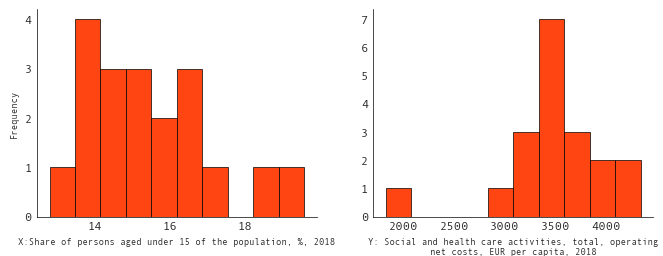

In [ ]:
# Plot histograms
f, ax = plt.subplots(nrows=1, ncols=2, figsize=cm2inch(18, 6.5))

x.plot(kind='hist', ax=ax[0])
y.plot(kind='hist', ax=ax[1])
# show bin edges ax[0].vlines([62.8, 77.9, 83.9, 95.5], 0, 5, color='blue')
ax[0].set_xlabel(f"X:{columnX}", wrap=True)
ax[1].set_xlabel(f'Y: {columnY}', wrap=True)
ax[1].set_ylabel('')
sns.despine()
r = np.corrcoef(x, y)
r

In [ ]:
f.savefig(f'bivariate-histogram-regions-{"-".join(columnX.split(" ")[0:2])}_{"-".join(columnY.split(" ")[0:2])}.png', dpi=300)

f1_1.savefig(f'bivariate-scatter-heatmap-regions-{"-".join(columnX.split(" ")[0:2])}_{"-".join(columnY.split(" ")[0:2])}.png', dpi=300)

## Load and visualize geodata, regions 

In [ ]:
# Load geodata for regions
path_to_data = 'geodata/maakunnat2018.geojson'
gdf = geopandas.read_file(path_to_data, encoding='utf-8')

gdf

vuosi maakunta                                      nimi  \
0    2018       01  Uusimaa                                    
1    2018       02  Varsinais-Suomi                            
2    2018       04  Satakunta                                  
3    2018       05  Kanta-Häme                                 
4    2018       06  Pirkanmaa                                  
5    2018       07  Päijät-Häme                                
6    2018       08  Kymenlaakso                                
7    2018       09  Etelä-Karjala                              
8    2018       10  Etelä-Savo                                 
9    2018       11  Pohjois-Savo                               
10   2018       12  Pohjois-Karjala                            
11   2018       13  Keski-Suomi                                
12   2018       14  Etelä-Pohjanmaa                            
13   2018       15  Pohjanmaa                                  
14   2018       16  Keski-Pohjanmaa                            
15   2018       17  Pohjois-Pohjanmaa                          
16   2018       18  Kainuu                                     
17   2018       19  Lappi                                      
18   2018       21  Ahvenanmaa - Åland                         

                                        namn  \
0   Nyland                                     
1   Egentliga Finland                          
2   Satakunta                                  
3   Egentliga Tavastland                       
4   Birkaland                                  
5   Päijänne-Tavastland                        
6   Kymmenedalen                               
7   Södra Karelen                              
8   Södra Savolax                              
9   Norra Savolax                              
10  Norra Karelen                              
11  Mellersta Finland                          
12  Södra Österbotten                          
13  Österbotten                                
14  Mellersta Österbotten                      
15  Norra Österbotten                          
16  Kajanaland                                 
17  Lappland                                   
18  Åland                                      

                                             geometry  
0   MULTIPOLYGON (((471700.241 6689530.360, 473959...  
1   MULTIPOLYGON (((187645.756 6730243.658, 189295...  
2   MULTIPOLYGON (((204918.293 6842328.746, 207777...  
3   MULTIPOLYGON (((358726.220 6715710.045, 365623...  
4   MULTIPOLYGON (((328776.641 6760201.180, 329878...  
5   MULTIPOLYGON (((424096.839 6726998.038, 431598...  
6   MULTIPOLYGON (((495632.095 6699207.637, 496531...  
7   MULTIPOLYGON (((554169.941 6726326.842, 561910...  
8   MULTIPOLYGON (((501677.656 6779725.218, 511075...  
9   MULTIPOLYGON (((583254.791 6891874.440, 585905...  
10  MULTIPOLYGON (((635242.406 6845880.073, 662181...  
11  MULTIPOLYGON (((391802.732 6814673.992, 416789...  
12  MULTIPOLYGON (((236801.933 6882124.138, 244232...  
13  MULTIPOLYGON (((282186.321 7077244.742, 283085...  
14  MULTIPOLYGON (((366787.924 7001300.583, 375623...  
15  MULTIPOLYGON (((417351.542 7219857.886, 418101...  
16  MULTIPOLYGON (((563043.244 7060737.936, 567078...  
17  MULTIPOLYGON (((412373.199 7276001.509, 413803...  
18  MULTIPOLYGON (((176037.160 6715875.563, 177436...

In [ ]:
# join with data table 1
gdf_data = gdf.merge(data_regional[['code', columnY, columnX, 'Population, 2018']],left_on='maakunta', right_on='code' )
gdf_data

vuosi maakunta                                      nimi  \
0    2018       01  Uusimaa                                    
1    2018       02  Varsinais-Suomi                            
2    2018       04  Satakunta                                  
3    2018       05  Kanta-Häme                                 
4    2018       06  Pirkanmaa                                  
5    2018       07  Päijät-Häme                                
6    2018       08  Kymenlaakso                                
7    2018       09  Etelä-Karjala                              
8    2018       10  Etelä-Savo                                 
9    2018       11  Pohjois-Savo                               
10   2018       12  Pohjois-Karjala                            
11   2018       13  Keski-Suomi                                
12   2018       14  Etelä-Pohjanmaa                            
13   2018       15  Pohjanmaa                                  
14   2018       16  Keski-Pohjanmaa                            
15   2018       17  Pohjois-Pohjanmaa                          
16   2018       18  Kainuu                                     
17   2018       19  Lappi                                      
18   2018       21  Ahvenanmaa - Åland                         

                                        namn  \
0   Nyland                                     
1   Egentliga Finland                          
2   Satakunta                                  
3   Egentliga Tavastland                       
4   Birkaland                                  
5   Päijänne-Tavastland                        
6   Kymmenedalen                               
7   Södra Karelen                              
8   Södra Savolax                              
9   Norra Savolax                              
10  Norra Karelen                              
11  Mellersta Finland                          
12  Södra Österbotten                          
13  Österbotten                                
14  Mellersta Österbotten                      
15  Norra Österbotten                          
16  Kajanaland                                 
17  Lappland                                   
18  Åland                                      

                                             geometry code  \
0   MULTIPOLYGON (((471700.241 6689530.360, 473959...   01   
1   MULTIPOLYGON (((187645.756 6730243.658, 189295...   02   
2   MULTIPOLYGON (((204918.293 6842328.746, 207777...   04   
3   MULTIPOLYGON (((358726.220 6715710.045, 365623...   05   
4   MULTIPOLYGON (((328776.641 6760201.180, 329878...   06   
5   MULTIPOLYGON (((424096.839 6726998.038, 431598...   07   
6   MULTIPOLYGON (((495632.095 6699207.637, 496531...   08   
7   MULTIPOLYGON (((554169.941 6726326.842, 561910...   09   
8   MULTIPOLYGON (((501677.656 6779725.218, 511075...   10   
9   MULTIPOLYGON (((583254.791 6891874.440, 585905...   11   
10  MULTIPOLYGON (((635242.406 6845880.073, 662181...   12   
11  MULTIPOLYGON (((391802.732 6814673.992, 416789...   13   
12  MULTIPOLYGON (((236801.933 6882124.138, 244232...   14   
13  MULTIPOLYGON (((282186.321 7077244.742, 283085...   15   
14  MULTIPOLYGON (((366787.924 7001300.583, 375623...   16   
15  MULTIPOLYGON (((417351.542 7219857.886, 418101...   17   
16  MULTIPOLYGON (((563043.244 7060737.936, 567078...   18   
17  MULTIPOLYGON (((412373.199 7276001.509, 413803...   19   
18  MULTIPOLYGON (((176037.160 6715875.563, 177436...   21   

    Social and health care activities, total, operating net costs, EUR per capita, 2018  \
0                                              2888.8                                     
1                                              3357.1                                     
2                                              3564.7                                     
3                                              3377.4                                     
4                                              3258.2             

In [ ]:
# test output of bivariate function for selected columns
bivariate(gdf_data, columnY, columnX, 3, yFirst=True)['bivariate']

X Share of persons aged under 15 of the population, %, 2018 [12.8 14.8 16.  19.6];
Y Social and health care activities, total, operating net costs, EUR per capita, 2018 [1824.  3365.9 3598.2 4341.1]


0     1-3
1     1-2
2     2-1
3     2-2
4     1-2
5     1-1
6     3-1
7     2-1
8     3-1
9     3-1
10    2-1
11    1-2
12    3-3
13    2-3
14    2-3
15    1-3
16    3-1
17    3-2
18    1-3
Name: bivariate, dtype: object

In [ ]:
# add column with calculated bivariate values based on select columns (low-high, etc)
gdf_data['bivariate'] = bivariate(gdf_data, columnY, columnX, 3, yFirst=True)['bivariate']
gdf_data

X Share of persons aged under 15 of the population, %, 2018 [12.8 14.8 16.  19.6];
Y Social and health care activities, total, operating net costs, EUR per capita, 2018 [1824.  3365.9 3598.2 4341.1]


vuosi maakunta                                      nimi  \
0    2018       01  Uusimaa                                    
1    2018       02  Varsinais-Suomi                            
2    2018       04  Satakunta                                  
3    2018       05  Kanta-Häme                                 
4    2018       06  Pirkanmaa                                  
5    2018       07  Päijät-Häme                                
6    2018       08  Kymenlaakso                                
7    2018       09  Etelä-Karjala                              
8    2018       10  Etelä-Savo                                 
9    2018       11  Pohjois-Savo                               
10   2018       12  Pohjois-Karjala                            
11   2018       13  Keski-Suomi                                
12   2018       14  Etelä-Pohjanmaa                            
13   2018       15  Pohjanmaa                                  
14   2018       16  Keski-Pohjanmaa                            
15   2018       17  Pohjois-Pohjanmaa                          
16   2018       18  Kainuu                                     
17   2018       19  Lappi                                      
18   2018       21  Ahvenanmaa - Åland                         

                                        namn  \
0   Nyland                                     
1   Egentliga Finland                          
2   Satakunta                                  
3   Egentliga Tavastland                       
4   Birkaland                                  
5   Päijänne-Tavastland                        
6   Kymmenedalen                               
7   Södra Karelen                              
8   Södra Savolax                              
9   Norra Savolax                              
10  Norra Karelen                              
11  Mellersta Finland                          
12  Södra Österbotten                          
13  Österbotten                                
14  Mellersta Österbotten                      
15  Norra Österbotten                          
16  Kajanaland                                 
17  Lappland                                   
18  Åland                                      

                                             geometry code  \
0   MULTIPOLYGON (((471700.241 6689530.360, 473959...   01   
1   MULTIPOLYGON (((187645.756 6730243.658, 189295...   02   
2   MULTIPOLYGON (((204918.293 6842328.746, 207777...   04   
3   MULTIPOLYGON (((358726.220 6715710.045, 365623...   05   
4   MULTIPOLYGON (((328776.641 6760201.180, 329878...   06   
5   MULTIPOLYGON (((424096.839 6726998.038, 431598...   07   
6   MULTIPOLYGON (((495632.095 6699207.637, 496531...   08   
7   MULTIPOLYGON (((554169.941 6726326.842, 561910...   09   
8   MULTIPOLYGON (((501677.656 6779725.218, 511075...   10   
9   MULTIPOLYGON (((583254.791 6891874.440, 585905...   11   
10  MULTIPOLYGON (((635242.406 6845880.073, 662181...   12   
11  MULTIPOLYGON (((391802.732 6814673.992, 416789...   13   
12  MULTIPOLYGON (((236801.933 6882124.138, 244232...   14   
13  MULTIPOLYGON (((282186.321 7077244.742, 283085...   15   
14  MULTIPOLYGON (((366787.924 7001300.583, 375623...   16   
15  MULTIPOLYGON (((417351.542 7219857.886, 418101...   17   
16  MULTIPOLYGON (((563043.244 7060737.936, 567078...   18   
17  MULTIPOLYGON (((412373.199 7276001.509, 413803...   19   
18  MULTIPOLYGON (((176037.160 6715875.563, 177436...   21   

    Social and health care activities, total, operating net costs, EUR per capita, 2018  \
0                                              2888.8                                     
1                                              3357.1                                     
2                                              3564.7                                     
3                                              3377.4                                     
4                                              3258.2             

## Bivariate color palettes

In [ ]:
#  Three bivariate color palettes: 
#  Orange Cyan, Blue Red High Saturation, Green Violet
colorPalettes ={
'OrCy':["#f1f1f1", "#73dbfb", "#00aef1", "#f5ca5a", "#ada09e", "#296d9c", "#ee8b15", "#9e550d", "#3f212a"], 
'BuRdHS':["#fdfbe2", "#edbba8", "#f84b5e", "#b0c9dc", "#9b7e8f", "#8a2b43", "#647de2", "#4b4588", "#25001a"],
'GnVi':["#e8f3f1", "#b7b9e7", "#936fc4", "#a2cb78", "#688b7c", "#5e5392", "#31991b", "#276e1d", "#0d4020"]}

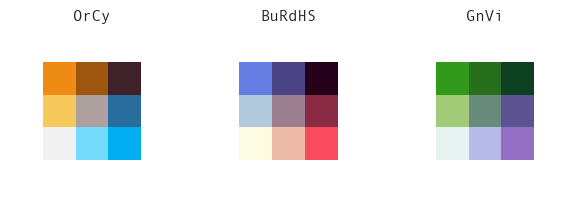

In [ ]:
fig_colors, ax = plt.subplots(1,3)

for i, key in enumerate(colorPalettes.keys()):
    ax[i].set_xlim(0,2.5)
    ax[i].set_ylim(0,2.5)
    ax[i].set_box_aspect(1)
    ax[i].axis('off')
    ax[i].set_title(key)
    for j, color in enumerate(colorPalettes[key]):
        rect = mpatches.Rectangle([0.5+0.5*(j%3),0.5+0.5*(j//3)], .5, .5, ec="none", color=color)
        ax[i].add_artist(rect)

(0.0, 2.5, 0.0, 2.5)

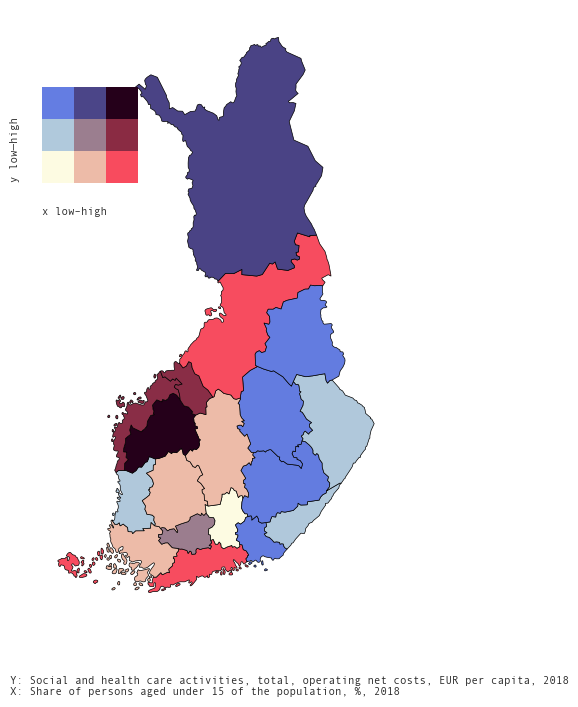

In [ ]:
# Plot bivariate choropleth map
fig, ax = plt.subplots(1,1, figsize=(4,8))

colorkey = list(colorPalettes)[1]

colors = colorPalettes[colorkey]

cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

ylabel = 'y low—high'
xlabel = 'x low–high'

gdf_data.plot('bivariate', legend=False, 
              ax=ax,
              cmap=cmap1,
#            scheme='quantiles',
              legend_kwds={'title':'Degree of urbanisation, %, 2018',
                        'loc':'upper right', 'bbox_to_anchor':(2, 1)})

ax.set_frame_on(False)
ax.axis('off')

fig.text(0, 0, f"Y: {columnY}\nX: {columnX}" )

left_inset_ax = fig.add_axes([0, 0.5, .4, .4], facecolor='k')


left_inset_ax.set_xlim(0,2.5)
left_inset_ax.set_ylim(0,2.5)
for i, color in enumerate(colors):
    rect = mpatches.Rectangle([0.5+0.5*(i%3),0.5+0.5*(i//3)], .5, .5, ec="none", color=color)
    left_inset_ax.add_artist(rect)


left_inset_ax.text(0.5, 0, xlabel, horizontalalignment='left')
left_inset_ax.text(0, 0.55, ylabel, horizontalalignment='left', rotation=90)
left_inset_ax.set_box_aspect(1)
left_inset_ax.axis('off')



In [ ]:
fig.savefig(f'bivariatemap_regional-{colorkey}-{"-".join(columnY.split(" ")[0:3])}{"-".join(columnX.split(" ")[0:3])}.pdf')

/var/folders/v9/1ptthzwx4sq42gbn1y5cvd700000gn/T/ipykernel_58003/227217964.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f'illustrations/bivariatemap_regional-{colorkey}-{"-".join(columnY.split(" ")[0:3])}{"-".join(columnX.split(" ")[0:3])}.pdf')


# Municipalities Dataset: X vs Y


In [ ]:
name = 'Kuntien avainluvut_20220926-211021'
data_municipal =pd.read_csv(f'tables/{name}.csv', sep=';', decimal=',', skiprows=0, dtype={'code': 'str'})
data_municipal

code       name  Degree of urbanisation, %, 2018  Population, 2018  \
0    020       Akaa                             87.5             16611   
1    005   Alajärvi                             61.4              9700   
2    009  Alavieska                             53.0              2573   
3    010     Alavus                             60.0             11544   
4    016   Asikkala                             64.7              8149   
..   ...        ...                              ...               ...   
306  977  Ylivieska                             86.0             15212   
307  980   Ylöjärvi                             88.4             32983   
308  981      Ypäjä                             40.3              2357   
309  989     Ähtäri                             62.1              5703   
310  992  Äänekoski                             75.8             18851   

     Population change from the previous year, %, 2018  \
0                                                 -0.9   
1                                                 -1.3   
2                                                 -1.4   
3                                                 -1.4   
4                                                 -1.2   
..                                                 ...   
306                                               -0.3   
307                                                0.3   
308                                               -0.6   
309                                               -3.4   
310                                               -1.5   

     Share of persons aged under 15 of the population, %, 2018  \
0                                                 17.7           
1                                                 17.4           
2                                                 19.4           
3                                                 17.0           
4                                                 14.2           
..                                                 ...           
306                                               21.5           
307                                               21.6           
308                                               13.5           
309                                               14.0           
310                                               15.9           

     Share of persons aged 15 to 64 of the population, %, 2018  \
0                                                 59.4           
1                                                 55.4           
2                                                 57.0           
3                                                 56.1           
4                                                 53.6           
..                                                 ...           
306                                               59.3           
307                                               60.8           
308                                               58.5           
309                                               54.9           
310                                               57.7           

     Share of persons aged over 64 of the population, %, 2018  \
0                                                 22.9          
1                                                 27.2          
2                                                 23.7          
3                                                 26.9          
4                                                 32.2          
..                                                 ...          
306                                               19.2          
307                                               17.6          
308                                               27.9          
309                                               31.1          
310                                               26.3          

     Share of Swedish-speakers of the population, %

In [ ]:
data_municipal.columns

Index(['code', 'name', 'Degree of urbanisation, %, 2018', 'Population, 2018',
       'Population change from the previous year, %, 2018',
       'Share of persons aged under 15 of the population, %, 2018',
       'Share of persons aged 15 to 64 of the population, %, 2018',
       'Share of persons aged over 64 of the population, %, 2018',
       'Share of Swedish-speakers of the population, %, 2018',
       'Share of foreign citizens of the population, %, 2018',
       'Excess of births, persons, 2018',
       'Intermunicipal migration gain/loss, persons, 2018',
       'Number of families, 2018', 'Number of household-dwelling units, 2018',
       'Share of household-dwelling units living in terraced houses and detached houses, %, 2018',
       'Share of household-dwelling units living in rental dwellings, %, 2018',
       'Share of persons aged 15 or over with at least upper secondary qualifications, %, 2018',
       'Share of persons aged 15 or over with tertiary level qualifications,

In [ ]:
# collection of pairs with where all combinations contain values in 3x3 categories, municipalities

# x_key = data_municipal.columns[1] #Degree of urbanisation, %, 2018 
# y_key = data_municipal.columns[3] #Population change from the previous year, %, 2018
# x_key = 'Share of persons aged under 15 of the population, %, 2018'
# y_key = 'Social and health care activities, total, operating net costs, EUR per capita, 2018'

# y_key = 'Share of persons aged under 15 of the population, %, 2018'
# y_key = 'Share of persons aged over 64 of the population, %, 2018'
# x_key =  data_municipal.columns[2]


# x_key =  'Share of Swedish-speakers of the population, %, 2018'
# y_key =         'Share of foreign citizens of the population, %, 2018'


# y_key = 'Share of workplaces in services, %, 2017'
# x_key = data_municipal.columns[2]

X Degree of urbanisation, %, 2018 [  0.          51.13333333  71.3        100.        ];
Y Share of workplaces in services, %, 2017 [28.         58.43333333 66.8        94.        ]


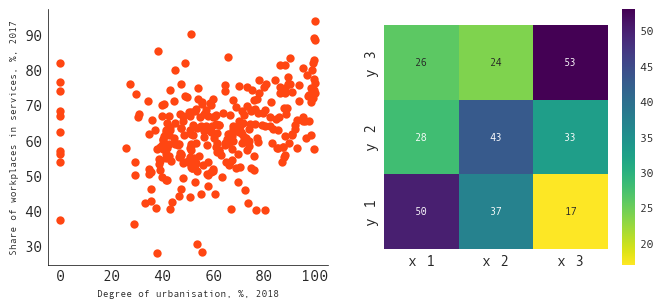

In [ ]:
# Contingency table for regional data

y_key = 'Share of workplaces in services, %, 2017'
x_key = data_municipal.columns[2]
x = data_municipal[x_key]
y = data_municipal[y_key]

data_municipal_bivariate = arrange_bivariate(bivariate(data_municipal, y_key, x_key, 3, yFirst=False)['bivariate'])
data_municipal_bivariate


f1_2, ax = plt.subplots(nrows=1, ncols=2, figsize=cm2inch(18, 8))

sns.set(font_scale=0.8)
plt.style.use('masters_xport.mplstyle')



sns.despine(f1_2, left=False, bottom=False)
sns.scatterplot(x=x, y=y,
                palette="ch:r=-.2,d=.3_r",linewidth=0, ax=ax[0])

sns.heatmap(data_municipal_bivariate, annot=True, square=True, cmap='viridis_r', ax=ax[1])

#xlabel = 'Share of persons aged under 15, %, 2018'
# ylabel = 'Social and health care activities, total,\noperating net costs, EUR per capita, 2018'
#ylabel = 'Share of persons aged over 64, %, 2018'
ylabel = y_key
xlabel = x_key
ax[0].set_xlabel(f'{xlabel}', fontsize=7, wrap=True)
ax[0].set_ylabel(f'{ylabel}', fontsize=7, wrap=True)
ax[1].invert_yaxis()


In [ ]:
f1_2.savefig(f'bivariate-scatter-heatmap-municipalities-{"-".join(x_key.split(" ")[0:2])}_{"-".join(y_key.split(" ")[0:2])}.png', dpi=300, bbox_inches='tight' )

/var/folders/v9/1ptthzwx4sq42gbn1y5cvd700000gn/T/ipykernel_58003/2865841146.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f1_2.savefig(f'illustrations/bivariate-scatter-heatmap-municipalities-{"-".join(x_key.split(" ")[0:2])}_{"-".join(y_key.split(" ")[0:2])}.png', dpi=300, bbox_inches='tight' )


In [ ]:
# selected data as new data frame with municipality codes

municipal_bivariate_coded = pd.DataFrame({'bivariate':bivariate(data_municipal, y_key, x_key, 3, yFirst=False)['bivariate'], 'name':data_municipal['name'], 'code':data_municipal['code'], y_key:data_municipal[y_key], x_key:data_municipal[x_key], 'Population, 2018':data_municipal['Population, 2018']  })
municipal_bivariate_coded

X Degree of urbanisation, %, 2018 [  0.          51.13333333  71.3        100.        ];
Y Share of workplaces in services, %, 2017 [28.         58.43333333 66.8        94.        ]


bivariate       name code  Share of workplaces in services, %, 2017  \
0         3-1       Akaa  020                                      58.3   
1         2-2   Alajärvi  005                                      59.3   
2         2-1  Alavieska  009                                      53.1   
3         2-2     Alavus  010                                      66.7   
4         2-2   Asikkala  016                                      58.7   
..        ...        ...  ...                                       ...   
306       3-3  Ylivieska  977                                      75.1   
307       3-3   Ylöjärvi  980                                      67.6   
308       1-2      Ypäjä  981                                      60.2   
309       2-2     Ähtäri  989                                      64.5   
310       3-1  Äänekoski  992                                      55.5   

     Degree of urbanisation, %, 2018  Population, 2018  
0                               87.5             16611  
1                               61.4              9700  
2                               53.0              2573  
3                               60.0             11544  
4                               64.7              8149  
..                               ...               ...  
306                             86.0             15212  
307                             88.4             32983  
308                             40.3              2357  
309                             62.1              5703  
310                             75.8             18851  

[311 rows x 6 columns]

array([[1.        , 0.33546105],
       [0.33546105, 1.        ]])

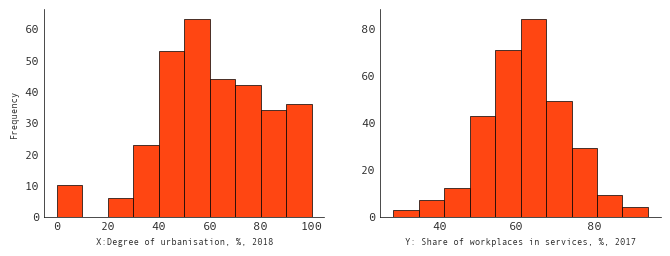

In [ ]:
# Municipalities histogram

f, ax = plt.subplots(nrows=1, ncols=2, figsize=cm2inch(18, 6.5))

x.plot(kind='hist', ax=ax[0])
y.plot(kind='hist', ax=ax[1])
ax[0].set_xlabel(f"X:{x_key}",  wrap=True)
ax[1].set_xlabel(f'Y: {ylabel}', wrap=True)
ax[1].set_ylabel('')
sns.despine()
r = np.corrcoef(x, y)
r


In [ ]:
f.savefig(f'bivariate-histogram-municipalities-{"-".join(x_key.split(" ")[0:2])}_{"-".join(y_key.split(" ")[0:2])}.png', dpi=300, bbox_inches='tight' )

/var/folders/v9/1ptthzwx4sq42gbn1y5cvd700000gn/T/ipykernel_58003/832969413.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.savefig(f'illustrations/bivariate-histogram-municipalities-{"-".join(x_key.split(" ")[0:2])}_{"-".join(y_key.split(" ")[0:2])}.png', dpi=300, bbox_inches='tight' )


## Load and visualize geodata, municipalities

In [ ]:
# Load geodata, municipalities
path_to_data = 'geodata/kunta4500k_2019.geojson'
gdf_municipalities = geopandas.read_file(path_to_data, encoding='utf-8')

gdf_municipalities

kunta  vuosi       nimi       namn       name  \
0     005   2019   Alajärvi   Alajärvi   Alajärvi   
1     009   2019  Alavieska  Alavieska  Alavieska   
2     010   2019     Alavus     Alavus     Alavus   
3     016   2019   Asikkala   Asikkala   Asikkala   
4     018   2019     Askola     Askola     Askola   
..    ...    ...        ...        ...        ...   
306   977   2019  Ylivieska  Ylivieska  Ylivieska   
307   980   2019   Ylöjärvi   Ylöjärvi   Ylöjärvi   
308   981   2019      Ypäjä      Ypäjä      Ypäjä   
309   989   2019     Ähtäri     Etseri     Ähtäri   
310   992   2019  Äänekoski  Äänekoski  Äänekoski   

                                              geometry  
0    MULTIPOLYGON (((348733.187 6959704.551, 343298...  
1    MULTIPOLYGON (((370424.741 7104339.037, 360962...  
2    MULTIPOLYGON (((317245.323 6922242.407, 310933...  
3    MULTIPOLYGON (((434407.880 6774122.311, 422536...  
4    MULTIPOLYGON (((423421.791 6704555.878, 420729...  
..                                                 ...  
306  MULTIPOLYGON (((384323.357 7093223.300, 368395...  
307  MULTIPOLYGON (((321683.421 6826506.299, 316192...  
308  MULTIPOLYGON (((296901.865 6736363.869, 290626...  
309  MULTIPOLYGON (((345455.367 6918226.112, 341008...  
310  MULTIPOLYGON (((432762.406 6929615.249, 429393...  

[311 rows x 6 columns]

In [ ]:
gdf_municipalities_data = gdf_municipalities.merge(municipal_bivariate_coded, left_on='kunta', right_on='code')
gdf_municipalities_data

kunta  vuosi       nimi       namn     name_x  \
0     005   2019   Alajärvi   Alajärvi   Alajärvi   
1     009   2019  Alavieska  Alavieska  Alavieska   
2     010   2019     Alavus     Alavus     Alavus   
3     016   2019   Asikkala   Asikkala   Asikkala   
4     018   2019     Askola     Askola     Askola   
..    ...    ...        ...        ...        ...   
306   977   2019  Ylivieska  Ylivieska  Ylivieska   
307   980   2019   Ylöjärvi   Ylöjärvi   Ylöjärvi   
308   981   2019      Ypäjä      Ypäjä      Ypäjä   
309   989   2019     Ähtäri     Etseri     Ähtäri   
310   992   2019  Äänekoski  Äänekoski  Äänekoski   

                                              geometry bivariate     name_y  \
0    MULTIPOLYGON (((348733.187 6959704.551, 343298...       2-2   Alajärvi   
1    MULTIPOLYGON (((370424.741 7104339.037, 360962...       2-1  Alavieska   
2    MULTIPOLYGON (((317245.323 6922242.407, 310933...       2-2     Alavus   
3    MULTIPOLYGON (((434407.880 6774122.311, 422536...       2-2   Asikkala   
4    MULTIPOLYGON (((423421.791 6704555.878, 420729...       2-1     Askola   
..                                                 ...       ...        ...   
306  MULTIPOLYGON (((384323.357 7093223.300, 368395...       3-3  Ylivieska   
307  MULTIPOLYGON (((321683.421 6826506.299, 316192...       3-3   Ylöjärvi   
308  MULTIPOLYGON (((296901.865 6736363.869, 290626...       1-2      Ypäjä   
309  MULTIPOLYGON (((345455.367 6918226.112, 341008...       2-2     Ähtäri   
310  MULTIPOLYGON (((432762.406 6929615.249, 429393...       3-1  Äänekoski   

    code  Share of workplaces in services, %, 2017  \
0    005                                      59.3   
1    009                                      53.1   
2    010                                      66.7   
3    016                                      58.7   
4    018                                      51.2   
..   ...                                       ...   
306  977                                      75.1   
307  980                                      67.6   
308  981                                      60.2   
309  989                                      64.5   
310  992                                      55.5   

     Degree of urbanisation, %, 2018  Population, 2018  
0                               61.4              9700  
1                               53.0              2573  
2                               60.0             11544  
3                               64.7              8149  
4                               53.8              4958  
..                               ...               ...  
306                             86.0             15212  
307                             88.4             32983  
308                             40.3              2357  
309                             62.1              5703  
310                             75.8             18851  

[311 rows x 12 columns]

# Bivariate map, municipalities

(0.0, 2.5, 0.0, 2.5)

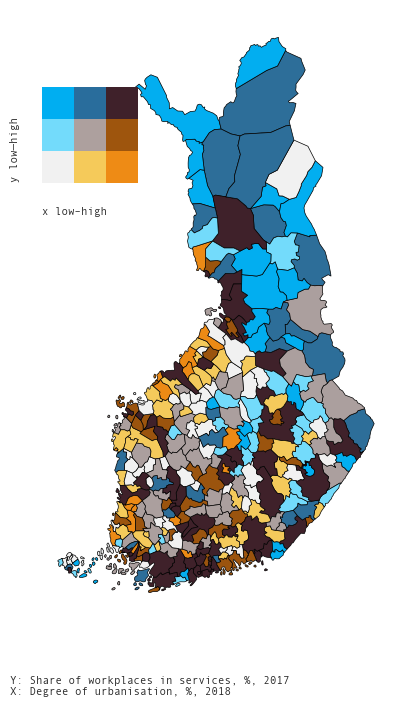

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(4,8))

# Use color palettes defined previously

colorkey = list(colorPalettes)[0]

colors = colorPalettes[colorkey]

cmapRegion = LinearSegmentedColormap.from_list("mycmap", colors)

ylabel = 'y low—high'
xlabel = 'x low–high'

gdf_municipalities_data.plot('bivariate', legend=False, 
              ax=ax,
              cmap=cmapRegion,
#            scheme='quantiles',
              legend_kwds={'title':'Degree of urbanisation, %, 2018',
                        'loc':'upper right', 'bbox_to_anchor':(2, 1)})

ax.set_frame_on(False)
ax.axis('off')

fig.text(0, 0, f"Y: {y_key}\nX: {x_key}" )

left_inset_ax = fig.add_axes([0, 0.5, .4, .4], facecolor='k')


left_inset_ax.set_xlim(0,2.5)
left_inset_ax.set_ylim(0,2.5)
for i, color in enumerate(colors):
    rect = mpatches.Rectangle([0.5+0.5*(i//3),0.5+0.5*(i%3)], .5, .5, ec="none", color=color)
    left_inset_ax.add_artist(rect)


left_inset_ax.text(0.5, 0, xlabel, horizontalalignment='left')
left_inset_ax.text(0, 0.55, ylabel, horizontalalignment='left', rotation=90)
left_inset_ax.set_box_aspect(1)
left_inset_ax.axis('off')

In [ ]:
fig.savefig(f'bivariatemap_municipal-{colorkey}-{"-".join(y_key.split(" ")[0:3])}{"-".join(x_key.split(" ")[0:3])}.pdf')

/var/folders/v9/1ptthzwx4sq42gbn1y5cvd700000gn/T/ipykernel_58003/1280434547.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f'illustrations/bivariatemap_municipal-{colorkey}-{"-".join(y_key.split(" ")[0:3])}{"-".join(x_key.split(" ")[0:3])}.pdf')


# Bivariate cartogram

In [ ]:
# Cartogram code by Daniel Lewis https://github.com/danlewis85/cartogrampy
# Bundled with notebook for convenience
# GNU GENERAL PUBLIC LICENSE Version 3, 29 June 2007
# documentation (somewhat spotty) https://danlewis85.github.io/cartogrampy/

from cartogram import Cartogram
from shapely.geometry import Point

## Regional dorling cartogram

In [ ]:

cg = Cartogram(gdf_data, 'Population, 2018')

In [ ]:
# calculate dorling cartogram: 
# NB - many warnings
# Using default 99 iterations and verbose mode
dorlingdata = cg.dorling()


/Users/jonatanhilden/anaconda3/envs/geodata/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 18.
  warnings.warn(message)
/Users/jonatanhilden/anaconda3/envs/geodata/lib/python3.10/site-packages/pandas/core/series.py:4539: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  new_values = self._map_values(arg, na_action=na_action)
/Users/jonatanhilden/anaconda3/envs/geodata/lib/python3.10/site-packages/pandas/core/series.py:4539: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  new_values = self._map_values(arg, na_action=na_action)
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Bo

iter: 0; displacement: 38183.82


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 1; displacement: 35603.54


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 2; displacement: 21980.03


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 3; displacement: 18017.61


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 4; displacement: 12364.69
iter: 5; displacement: 9620.97


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 6; displacement: 7743.39
iter: 7; displacement: 6539.17


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 8; displacement: 5792.85
iter: 9; displacement: 5004.02


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 10; displacement: 4371.38
iter: 11; displacement: 3599.77


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 12; displacement: 3184.79
iter: 13; displacement: 2799.55


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 14; displacement: 2439.39
iter: 15; displacement: 2236.30


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 16; displacement: 2058.15
iter: 17; displacement: 1898.23


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 18; displacement: 1480.09
iter: 19; displacement: 1353.53


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 20; displacement: 1242.17
iter: 21; displacement: 1143.86


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 22; displacement: 1056.58


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 23; displacement: 959.10


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 24; displacement: 892.32


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 25; displacement: 834.30


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 26; displacement: 778.19
iter: 27; displacement: 723.19


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 28; displacement: 682.58
iter: 29; displacement: 645.46


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 30; displacement: 611.32
iter: 31; displacement: 579.77


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 32; displacement: 550.53
iter: 33; displacement: 523.36


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 34; displacement: 498.05
iter: 35; displacement: 474.41


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 36; displacement: 452.29


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 37; displacement: 431.54
iter: 38; displacement: 3834.56


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 39; displacement: 1113.73


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 40; displacement: 996.19


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 41; displacement: 881.79


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 42; displacement: 787.45


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 43; displacement: 709.90


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 44; displacement: 644.90
iter: 45; displacement: 588.58


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 46; displacement: 538.91


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 47; displacement: 495.11
iter: 48; displacement: 456.38


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 49; displacement: 421.97


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 50; displacement: 391.33


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 51; displacement: 363.88


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 52; displacement: 339.02


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 53; displacement: 315.78


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 54; displacement: 294.48


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 55; displacement: 255.09


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 56; displacement: 239.07
iter: 57; displacement: 224.90


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 58; displacement: 211.68
iter: 59; displacement: 199.33


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 60; displacement: 187.83
iter: 61; displacement: 177.14


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 62; displacement: 167.20
iter: 63; displacement: 157.96


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 64; displacement: 149.37
iter: 65; displacement: 141.37


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 66; displacement: 133.92
iter: 67; displacement: 126.97


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 68; displacement: 120.48
iter: 69; displacement: 114.42


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 70; displacement: 108.75
iter: 71; displacement: 103.44


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 72; displacement: 98.47
iter: 73; displacement: 93.80


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 74; displacement: 89.42


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 75; displacement: 85.31
iter: 76; displacement: 81.44


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 77; displacement: 77.79


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 78; displacement: 74.36


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 79; displacement: 71.12


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 80; displacement: 68.06


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 81; displacement: 65.17
iter: 82; displacement: 62.44


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 83; displacement: 3948.01
iter: 84; displacement: 985.18


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 85; displacement: 780.25
iter: 86; displacement: 711.63


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 87; displacement: 640.18
iter: 88; displacement: 449.18


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 89; displacement: 392.84
iter: 90; displacement: 347.05


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 91; displacement: 309.51
iter: 92; displacement: 278.27


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 93; displacement: 251.86
iter: 94; displacement: 229.21


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 95; displacement: 209.52
iter: 96; displacement: 192.23


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

iter: 97; displacement: 176.91
iter: 98; displacement: 163.24


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/dataprocess-attachment/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
 

(0.0, 2.5, 0.0, 2.5)

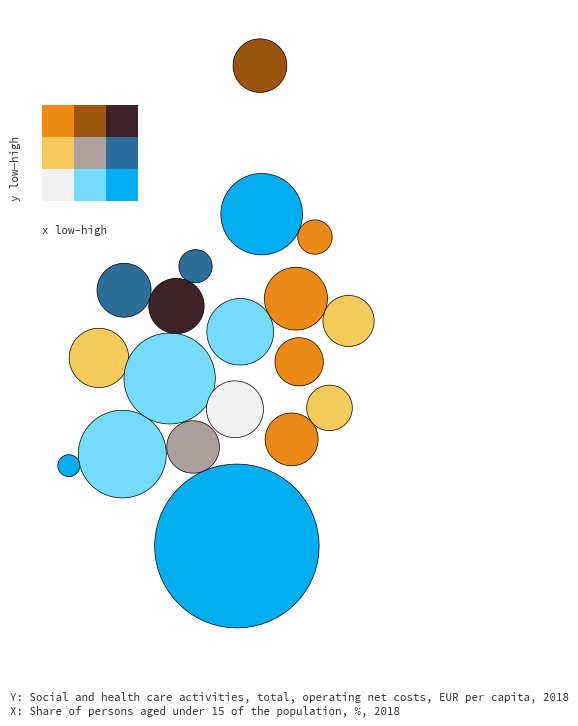

In [ ]:
# Regional Dorling cartogram with bivariate colors
colorkey = list(colorPalettes)[0]

colors = colorPalettes[colorkey]

cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

ylabel = 'y low—high'
xlabel = 'x low–high'


fig, ax = plt.subplots(1,1,figsize=(4,8))


dorlingdata.plot(column = 'bivariate',cmap = cmap1, 
#scheme = 'Quantiles', 
#k=4,
legend=False, ax=ax)
ax.axis('equal')

ax.set_frame_on(False)
ax.axis('off')

fig.text(0, 0, f"Y: {columnY}\nX: {columnX}" )

left_inset_ax = fig.add_axes([0, 0.5, .4, .4], facecolor='k')


left_inset_ax.set_xlim(0,2.5)
left_inset_ax.set_ylim(0,2.5)
for i, color in enumerate(colors):
    rect = mpatches.Rectangle([0.5+0.5*(i%3),0.5+0.5*(i//3)], .5, .5, ec="none", color=color)
    left_inset_ax.add_artist(rect)


left_inset_ax.text(0.5, 0, xlabel, horizontalalignment='left')
left_inset_ax.text(0, 0.55, ylabel, horizontalalignment='left', rotation=90)
left_inset_ax.set_box_aspect(1)
left_inset_ax.axis('off')


In [ ]:
fig.savefig(f'bivariatemap_dorling_regional-{colorkey}-{"-".join(columnY.split(" ")[0:3])}{"-".join(columnX.split(" ")[0:3])}.pdf')

## Municipal dorling cartogram
### NB! Takes many minutes to run with default parameters

In [ ]:
# Consider trying less iterations?
cg_muni = Cartogram(gdf_municipalities_data, 'Population, 2018')
dorlingdata_muni = cg_muni.dorling()

/Users/jonatanhilden/anaconda3/envs/geodata/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 11 islands with ids: 7, 17, 21, 112, 116, 122, 124, 148, 152, 255, 303.
  warnings.warn(message)
/Users/jonatanhilden/anaconda3/envs/geodata/lib/python3.10/site-packages/pandas/core/series.py:4539: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  new_values = self._map_values(arg, na_action=na_action)
/Users/jonatanhilden/anaconda3/envs/geodata/lib/python3.10/site-packages/pandas/core/series.py:4539: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  new_values = self._map_values(arg, na_action=na_action)
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartog

iter: 0; displacement: 14801.05


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 1; displacement: 13909.45


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 2; displacement: 13661.16


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 3; displacement: 12832.00


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 4; displacement: 12373.83


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 5; displacement: 11706.96


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 6; displacement: 11738.41


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 7; displacement: 11933.80


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 8; displacement: 10358.64


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 9; displacement: 9931.37


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 10; displacement: 10059.80


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 11; displacement: 8856.46


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 12; displacement: 7888.25


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 13; displacement: 7279.21


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 14; displacement: 6641.45


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 15; displacement: 6204.14


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 16; displacement: 6756.98


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 17; displacement: 5274.37


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 18; displacement: 5075.98


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 19; displacement: 5480.29


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 20; displacement: 5457.41


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 21; displacement: 4762.35


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 22; displacement: 5087.30


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 23; displacement: 5081.37


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 24; displacement: 5129.25


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 25; displacement: 4944.37


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 26; displacement: 5033.26


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 27; displacement: 4814.66


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 28; displacement: 4915.17


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 29; displacement: 4911.23


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 30; displacement: 4418.32


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 31; displacement: 4111.25


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 32; displacement: 4384.52


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 33; displacement: 4292.14


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 34; displacement: 3871.47


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 35; displacement: 3800.18


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 36; displacement: 3308.06


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 37; displacement: 3602.01


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 38; displacement: 3706.96


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 39; displacement: 3509.99


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 40; displacement: 3263.92


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 41; displacement: 3280.78


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 42; displacement: 3467.17


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 43; displacement: 3073.77


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 44; displacement: 3110.27


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 45; displacement: 3162.55


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 46; displacement: 3069.17


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 47; displacement: 3483.32


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 48; displacement: 3119.13


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 49; displacement: 3099.22


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 50; displacement: 2727.95


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 51; displacement: 2988.95


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 52; displacement: 3161.88


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 53; displacement: 3535.06


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 54; displacement: 3079.46


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 55; displacement: 2736.23


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 56; displacement: 3126.70


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 57; displacement: 2645.43


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 58; displacement: 2408.15


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 59; displacement: 2694.33


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 60; displacement: 2467.28


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 61; displacement: 2888.25


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 62; displacement: 2840.32


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 63; displacement: 2607.27


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 64; displacement: 2753.35


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 65; displacement: 2222.36


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 66; displacement: 2513.53


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 67; displacement: 2338.82


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 68; displacement: 2479.54


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 69; displacement: 2865.61


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 70; displacement: 2141.83


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 71; displacement: 2581.68


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 72; displacement: 2279.67


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 73; displacement: 2191.31


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 74; displacement: 2297.45


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 75; displacement: 2378.45


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 76; displacement: 2037.15


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 77; displacement: 2381.54


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 78; displacement: 2326.19


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 79; displacement: 2278.71


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 80; displacement: 2285.77


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 81; displacement: 2460.31


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 82; displacement: 2232.65


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 83; displacement: 2298.67


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 84; displacement: 2108.87


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 85; displacement: 2313.88


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 86; displacement: 2416.30


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 87; displacement: 2476.62


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 88; displacement: 2365.52


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 89; displacement: 2221.43


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 90; displacement: 2265.78


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 91; displacement: 2369.19


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 92; displacement: 2516.58


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 93; displacement: 2088.49


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 94; displacement: 2426.12


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 95; displacement: 2190.64


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 96; displacement: 2248.56


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 97; displacement: 2716.80


/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jonatan Hilden/MASTERS/cartogram.py:346: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.distance(row[self.geom_field]).between(
/Users/jonatanhilden/Koponen+Hildén Dropbox/Jon

iter: 98; displacement: 2023.12


(0.0, 2.5, 0.0, 2.5)

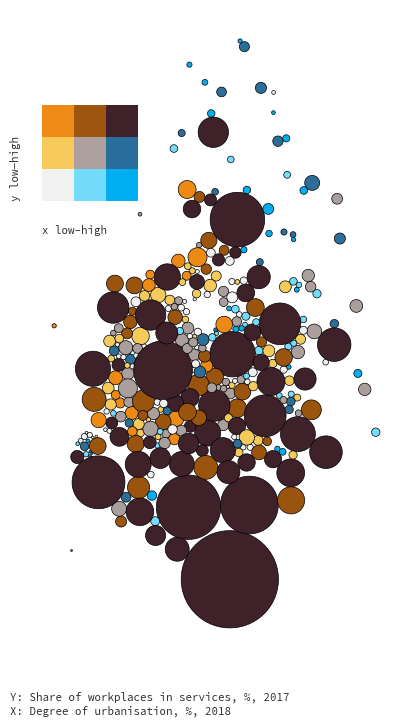

In [ ]:
# Regional Dorling cartogram with bivariate colors
colorkey = list(colorPalettes)[0]

colors = colorPalettes[colorkey]

cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

ylabel = 'y low—high'
xlabel = 'x low–high'


fig, ax = plt.subplots(1,1,figsize=(4,8))


dorlingdata_muni.plot(column = 'bivariate',cmap = cmap1, 
#scheme = 'Quantiles', 
#k=4,
legend=False, ax=ax)
ax.axis('equal')

ax.set_frame_on(False)
ax.axis('off')

fig.text(0, 0, f"Y: {y_key}\nX: {x_key}" )

left_inset_ax = fig.add_axes([0, 0.5, .4, .4], facecolor='k')


left_inset_ax.set_xlim(0,2.5)
left_inset_ax.set_ylim(0,2.5)
for i, color in enumerate(colors):
    rect = mpatches.Rectangle([0.5+0.5*(i%3),0.5+0.5*(i//3)], .5, .5, ec="none", color=color)
    left_inset_ax.add_artist(rect)


left_inset_ax.text(0.5, 0, xlabel, horizontalalignment='left')
left_inset_ax.text(0, 0.55, ylabel, horizontalalignment='left', rotation=90)
left_inset_ax.set_box_aspect(1)
left_inset_ax.axis('off')


In [ ]:
fig.savefig(f'bivariatemap_dorling_municipal-{colorkey}-{"-".join(y_key.split(" ")[0:3])}{"-".join(x_key.split(" ")[0:3])}.pdf')